# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
%matplotlib inline

In [258]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how ='outer' )

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Check for any missing data
combined_df.isna().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [5]:
# Checking the number of mice.
combined_df['Mouse ID'].value_counts().count()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Check for any duplicates using these unique IDs i.e., Mouse ID and Timepoint. 
duplicate_mouse_ID = combined_df.loc[combined_df.duplicated(subset = ['Timepoint','Mouse ID']), 'Mouse ID'].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [7]:
# Peruse all data only with duplicated mouse ID and Timepoint
duplicate_mice_df = combined_df.loc[combined_df.duplicated(subset=['Timepoint','Mouse ID'], keep =False), :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
#create a copy of dataframe
combined_df_2=combined_df.copy()

In [9]:
# Peruse all data with mouse ID g989
duplicate_mice_ID_df =  combined_df_2.loc[combined_df_2['Mouse ID']== 'g989', :]
duplicate_mice_ID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df['Mouse ID'] != 'g989', :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics
### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tummor = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tummor = clean_df.sort_values("Tumor Volume (mm3)", ascending = True).groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tummor = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev_tummor = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tummor = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tummor,
            "Median Tumor Volume":median_tummor,
            "Tumor Volume Variance":variance_tummor,
            "Tumor Volume Std. Dev.":stdev_tummor,
            "Tumor Volume Std. Err.":sem_tummor
                 })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

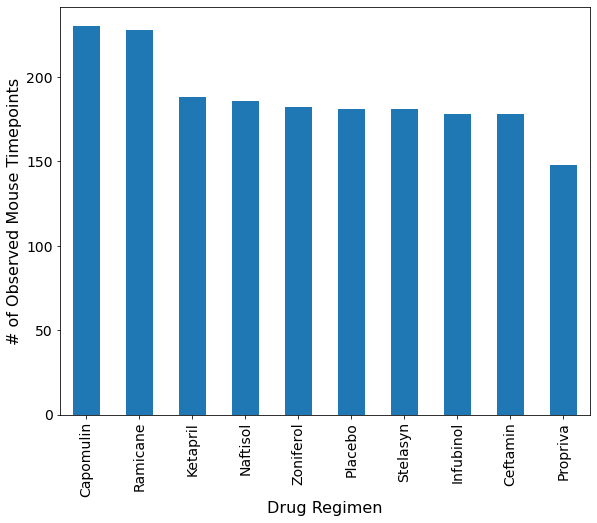

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
fig = clean_df["Drug Regimen"].value_counts().plot(kind="bar", figsize = (9.5,7.5))
fig.set_xlabel ("Drug Regimen", size = 16)
fig.set_ylabel ("# of Observed Mouse Timepoints", size = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

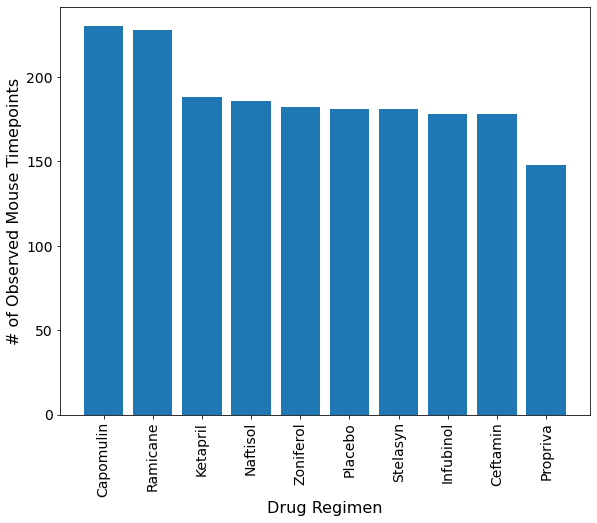

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = clean_df["Drug Regimen"].value_counts()
plt.figure(figsize=(9.5,7.5))
plt.bar(drug_count.index, drug_count.values)
plt.xlabel("Drug Regimen", size =16)
plt.ylabel("# of Observed Mouse Timepoints", size = 16)
plt.xticks(rotation="vertical", fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [16]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


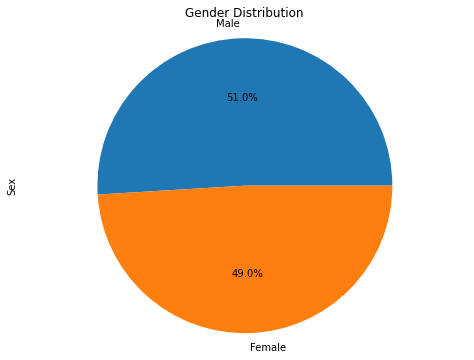

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_df["Sex"].value_counts()
plt.figure()
fig=gender_distribution.plot(kind="pie",title="Gender Distribution", y= gender_distribution.index, autopct= "%1.1f%%", figsize=(8, 6),
                                labels = gender_distribution.index)
plt.axis('equal')
plt.show()

In [18]:
gender_distribution

Male      958
Female    922
Name: Sex, dtype: int64

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
selected_treatments = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | 
                                    (clean_df["Drug Regimen"] == "Ramicane") |
                                    (clean_df["Drug Regimen"] == "Infubinol") |
                                    (clean_df["Drug Regimen"] == "Ceftamin"),
                                    ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)" ]        
                                ]
selected_treatments
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = selected_treatments.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df= max_timepoint.merge(clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]], 
                                                 on = ["Mouse ID", "Timepoint"], how = "left")
tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [152]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [[] for i in range(4)]

for i in range(len(tumor_volume_df["Tumor Volume (mm3)"])):
    if tumor_volume_df["Drug Regimen"][i] == treatments [0]:
        tumor_vol_data[0].append(tumor_volume_df["Tumor Volume (mm3)"][i])
    elif tumor_volume_df["Drug Regimen"][i] == treatments [1]:
        tumor_vol_data[1].append(tumor_volume_df["Tumor Volume (mm3)"][i])
    elif tumor_volume_df["Drug Regimen"][i] == treatments [2]:
        tumor_vol_data[2].append(tumor_volume_df["Tumor Volume (mm3)"][i])
    elif tumor_volume_df["Drug Regimen"][i] == treatments [3]:
        tumor_vol_data[3].append(tumor_volume_df["Tumor Volume (mm3)"][i])

[[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.125164399999996, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.896238399999998], [38.407618299999996, 43.04754260000001, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575], [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.321345799999996, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 

In [142]:
#Create empty list to fill for quartile calculations
quartiles = [[] for i in range (4)]
lowerq = [[] for i in range (4)]
upperq = [[] for i in range (4)]
iqr = [[] for i in range (4)]
lower_bound = [[] for i in range (4)]
upper_bound = [[] for i in range (4)]

#create an empty dictionary for outliers
outliers_list = {}

#initialize index for quartile bound
bound_index = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, treatment in enumerate (treatments):
      # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles [index] = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == treatment].quantile([.25,.5,.75])["Tumor Volume (mm3)"]
    # add subset 
    # Determine outliers using upper and lower bounds
    lowerq [index]= quartiles[index][0.25]
    upperq [index] = quartiles[index][0.75]
    iqr[index] = upperq[index]-lowerq[index]
    
    print(f"The lower quartile of {treatment} is: {round(lowerq[index],2)}")
    print(f"The upper quartile of {treatment} is: {round(upperq[index],2)}")
    print(f"The interquartile range of {treatment} is: {round(iqr[index],2)}")
    
    lower_bound [index] = lowerq[index] - (1.5*iqr[index])
    upper_bound [index] = upperq[index] + (1.5*iqr[index])
    
    print(f"Potential outliers for {treatment} could exist below {round(lower_bound[index],2)}")
    print(f"Potential outliers for {treatment} could exist above {round(upper_bound[index],2)}")
    print("-----------------------------------------------------")
    
while bound_index <= 3:
    for i in range(len(tumor_volume_df["Tumor Volume (mm3)"])):
        if (tumor_volume_df["Tumor Volume (mm3)"][i] < lower_bound [bound_index])\
        & (tumor_volume_df["Drug Regimen"][i] == treatments[bound_index]):
            outliers_list[tumor_volume_df["Drug Regimen"][i]] = tumor_volume_df["Tumor Volume (mm3)"][i]
        
        elif (tumor_volume_df["Tumor Volume (mm3)"][i] > upper_bound [bound_index])\
        & (tumor_volume_df["Drug Regimen"][i] == treatments[bound_index]):
            outliers_list[tumor_volume_df["Drug Regimen"][i]] = tumor_volume_df["Tumor Volume (mm3)"][i]  
            
    #increase bound index
    bound_index += 1

# Get the outliers for each Drug Regiment
for drug, outliers in outliers_list.items():
    print(f'The outlier(s) for {drug}: {round(outliers,2)}')

   
    

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
Potential outliers for Capomulin could exist below 20.7
Potential outliers for Capomulin could exist above 51.83
-----------------------------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
Potential outliers for Ramicane could exist below 17.91
Potential outliers for Ramicane could exist above 54.31
-----------------------------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
Potential outliers for Infubinol could exist below 36.83
Potential outliers for Infubinol could exist above 82.74
-----------------------------------------------------
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceft

In [177]:
outliers_list['Infubinol']

36.321345799999996

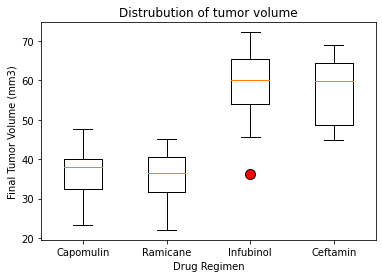

In [189]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
fig = ax1.boxplot(tumor_vol_data, labels=treatments, \
                  flierprops = dict(marker = "o",markersize=10, markerfacecolor = "red"))
ax1.set_title('Distrubution of tumor volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

In [227]:
#Get all mouse ID
mouse_id = list(clean_df.loc[clean_df["Mouse ID"]=='l509'])

Text(0, 0.5, 'Tumor Volume (mm3)')

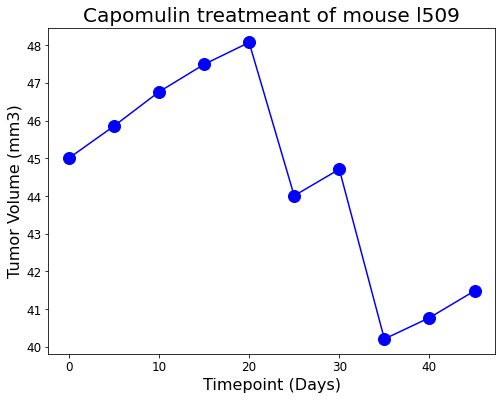

In [251]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_and_mouseID_df = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin') & (clean_df["Mouse ID"] == 'l509'), :]
                            
capomulin_and_mouseID_df= capomulin_and_mouseID_df[["Mouse ID","Tumor Volume (mm3)", 'Timepoint' ]].reset_index(drop= True)
plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(capomulin_and_mouseID_df["Timepoint"], capomulin_df["Tumor Volume (mm3)"], \
         marker='o', markersize = 12 ,color="blue")
plt.title('Capomulin treatmeant of mouse l509', size =20)
plt.xlabel('Timepoint (Days)', size =16)
plt.ylabel('Tumor Volume (mm3)', size =16)
plt.show()


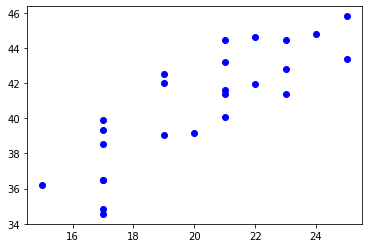

In [255]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin') , :]
avg_mouse_weight = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_mouse_weight['Weight (g)'],avg_mouse_weight['Tumor Volume (mm3)'], color="blue")

plt.show()

## Correlation and Regression

In [256]:
correlation = st.pearsonr(avg_mouse_weight['Weight (g)'],avg_mouse_weight['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


Text(20, 36, 'y = 0.95 x + 21.55')

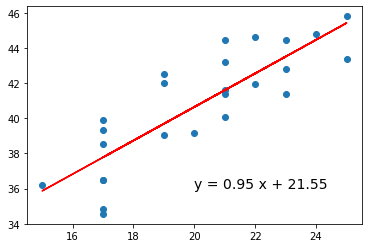

In [263]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
regress_values=avg_mouse_weight["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
plt.plot(avg_mouse_weight["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)